The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like Radio, TV, and Newspapers. 
Objectives: 
i.	Understand the Dataset & cleanup (if required).
ii.	Build Regression model to predict the sales w.r.t Radio features.
iii.	Also evaluate the model using scores RMSE


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('./dataset/advertising/advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [5]:
print(df.describe())

       Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
count  200.000000        200.000000           200.000000   
mean   100.500000        147.042500            23.264000   
std     57.879185         85.854236            14.846809   
min      1.000000          0.700000             0.000000   
25%     50.750000         74.375000             9.975000   
50%    100.500000        149.750000            22.900000   
75%    150.250000        218.825000            36.525000   
max    200.000000        296.400000            49.600000   

       Newspaper Ad Budget ($)   Sales ($)  
count               200.000000  200.000000  
mean                 30.554000   14.022500  
std                  21.778621    5.217457  
min                   0.300000    1.600000  
25%                  12.750000   10.375000  
50%                  25.750000   12.900000  
75%                  45.100000   17.400000  
max                 114.000000   27.000000  


Preprocessing

In [6]:
print(df.isnull().sum())

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64


In [7]:
# If there are any missing values
df = df.dropna(subset=["TV Ad Budget ($)",	"Radio Ad Budget ($)", 	"Newspaper Ad Budget ($)",	"Sales ($)"])

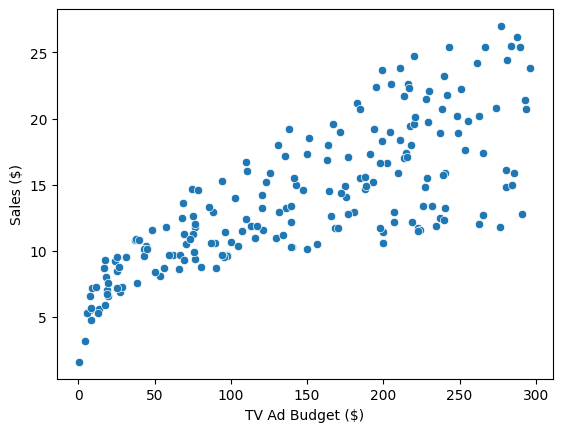

In [8]:
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.show()

sns.scatterplot(data=df, x="TV Ad Budget ($)", y="Sales ($)")
plt.show()

Regression Model

In [10]:
#  Feature (Radio) and target (Sales)
X = df[['TV Ad Budget ($)']]
y = df['Sales ($)']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.194472431998898


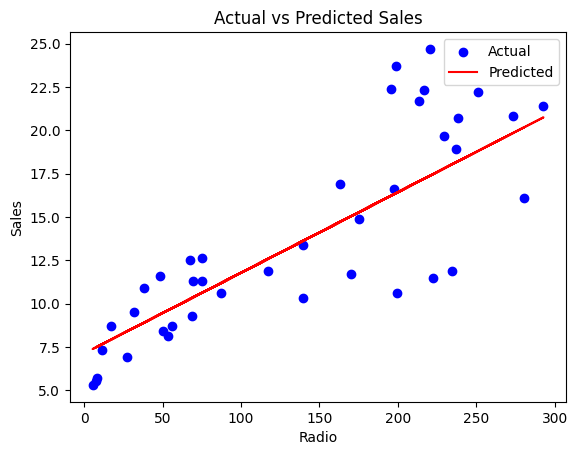

In [15]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

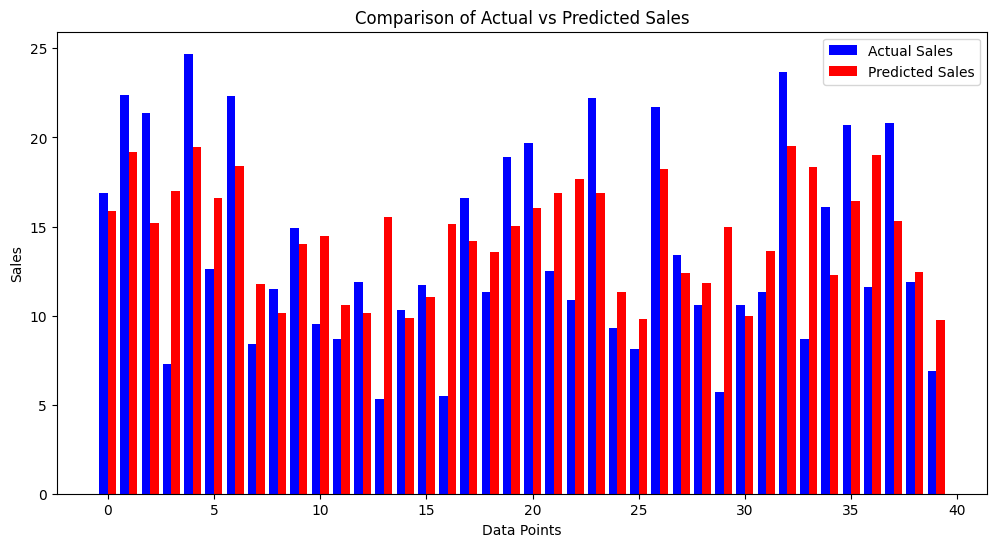

In [17]:
# 4-6
plt.figure(figsize=(12,6))

indices = np.arange(len(y_test))
plt.bar(indices - 0.2, y_test, width=0.4, label='Actual Sales', color='blue')
plt.bar(indices + 0.2, y_pred, width=0.4, label='Predicted Sales', color='red')

plt.title('Comparison of Actual vs Predicted Sales')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.legend()

plt.show()